<a href="https://colab.research.google.com/github/ospinooo/mushsnap-research/blob/master/MushSnap_UCI_Dataset_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MushSnap UCI-ML Dataset

On this notebook we will develop a Machine learning algorithm with the use of a public dataset on the features of Mushrooms. This dataset belongs to the UC Irvine Machine Learning Repository. If you want to learn more about this dataset here is the link:

- https://archive.ics.uci.edu/ml/datasets/Mushroom

In [0]:
# Which GPU?
!nvidia-smi

Wed Jun  3 10:16:44 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!pip install -q tensorflow-gpu==2.1.0

     |████████████████████████████████| 421.8MB 20kB/s 
     |████████████████████████████████| 3.9MB 36.4MB/s 
     |████████████████████████████████| 450kB 41.1MB/s 
ERROR: tensorflow 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.


In [0]:
# TensorFlow version
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Kaggle Dataset 

The dataset is also published in kaggle. We will install the kaggle library and download it directly from there.


> WE NEED TO COPY OUR `kaggle.json` FILE TO BE ABLE TO DOWNLOAD THE DATA.

In [0]:
# Install and activate kaggle
!pip install -q --upgrade kaggle
!mkdir -p ~/.kaggle
!cp drive/'My Drive'/'final project'/kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [0]:
# Download the kaggle dataset
!kaggle datasets download -d uciml/mushroom-classification

  0% 0.00/34.2k [00:00<?, ?B/s]
100% 34.2k/34.2k [00:00<00:00, 13.4MB/s]


In [0]:
# Unzip dataset
!unzip -q mushroom-classification.zip
!ls

drive  mushroom-classification.zip  mushrooms.csv  sample_data


## Features Dataset

In this section we will go through the different features available in the dataset.

In [0]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
DATASET_FILENAME = "mushrooms.csv"

In [0]:
data = pd.read_csv(DATASET_FILENAME)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


As we can see the different features have its own characters to refer to each one of the possibilities each feature has. Here is the cheatsheet of them:

Attribute Information:

1. **cap-shape**: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. **cap-surface**: fibrous=f,grooves=g,scaly=y,smooth=s
3. **cap-color**: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. **bruises?**: bruises=t,no=f
5. **odor**: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. **gill-attachment**: attached=a,descending=d,free=f,notched=n
7. **gill-spacing**: close=c,crowded=w,distant=d
8. **gill-size**: broad=b,narrow=n
9. **gill-color**: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. **stalk-shape**: enlarging=e,tapering=t
11. **stalk-root**: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. **stalk-surface-above-ring**: fibrous=f,scaly=y,silky=k,smooth=s
13. **stalk-surface-below-ring**: fibrous=f,scaly=y,silky=k,smooth=s
14. **stalk-color-above-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. **stalk-color-below-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. **veil-type**: partial=p,universal=u
17. **veil-color**: brown=n,orange=o,white=w,yellow=y
18. **ring-number**: none=n,one=o,two=t
19. **ring-type**: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. **spore-print-color**: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. **population**: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. **habitat**: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [0]:
# Null Check
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

The dataset doesn't have null values.

In [0]:
# Target class
data['class'].unique()

array(['p', 'e'], dtype=object)

In [0]:
# Total instances
print(f"Total number of examples: {data.shape[0]}")
print(f"Total number of atributes: {data.shape[1]}")

Total number of examples: 8124
Total number of atributes: 23


## Transformation of Categorical features.

Thus we have 22 features(1st one is label) and 8124 instances.
Now let us check which features constitutes maximum information.

We will apply a Label encoder to every column in which every category will be mapped to a single number.

In [0]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
 
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [0]:
# Instances per class
print(data.groupby('class').size())

class
0    4208
1    3916
dtype: int64


In [0]:
# Divide in X and y
X = data.iloc[:, 1:]  # all rows, all the features and no labels
y = data.iloc[:, 0]  # all rows, label only
X.head()
columns = X.columns

In [0]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [0]:
y.head(), columns


(0    1
 1    0
 2    0
 3    1
 4    0
 Name: class, dtype: int64,
 Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
        'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
        'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
        'stalk-surface-below-ring', 'stalk-color-above-ring',
        'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
        'ring-type', 'spore-print-color', 'population', 'habitat'],
       dtype='object'))

## Features correlation matrix


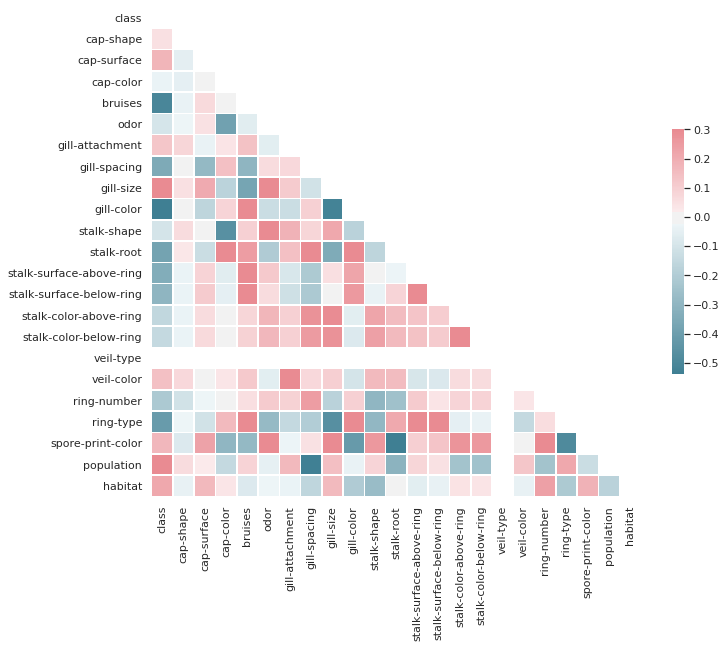

In [0]:
sns.set(style="white")
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Features normalization 

In [0]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

### Principal Components Analysis

We are going to transform our features with the PCA algorithm. We will get in the end the hightest variance with the less number of features. Instead of using the whole 23 features for the training process we will use just a few that will hold almost all the required variance to predict succesfully.

In [0]:
# Transformation into PCA features.
# Highest variance with the less number of features.
from sklearn.decomposition import PCA
pca = PCA()
pd.DataFrame(pca.fit_transform(X)).head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-0.574322,-0.975781,-1.221762,0.185505,-1.451920,-1.538255,1.206300,1.545333,1.604984,0.405963,-0.690598,0.821627,0.080134,0.611855,-0.519966,-0.782544,1.120259,-0.004570,-0.359782,-0.208581,0.008140,-1.281683e-17
1,-2.282102,0.279066,-1.200497,0.272056,-1.501531,-1.486986,1.082778,-0.340684,-0.661795,-0.158524,0.194346,-1.387830,-0.185504,-0.916553,-0.113078,-0.730934,-0.018174,0.366562,0.278532,0.152239,-0.196446,3.505657e-17
2,-1.858036,-0.270972,-1.372371,1.055963,-1.810316,-0.874188,-1.768193,-0.286344,0.674741,0.339317,-0.293566,-0.511113,-0.033061,-0.519470,0.016525,-0.656167,0.107914,-0.181087,0.364882,0.257582,-0.362577,1.555151e-17
3,-0.884780,-0.756468,-1.342068,0.370162,-2.111239,-2.110207,1.089952,1.243782,0.709039,0.478215,-1.285118,1.213600,0.434106,0.025716,-0.059661,-0.454026,0.994198,-0.082612,-0.393285,-0.169119,0.157344,1.440469e-17
4,0.689613,1.239262,-3.113237,0.814721,1.541685,-0.555917,0.585614,1.598763,-0.851453,1.436707,-0.015359,-1.260035,-0.682285,0.517256,-0.514080,0.242658,-0.311933,-0.587410,-0.159598,0.167047,0.061573,-5.241867e-18


In [0]:
explained_variance = pca.explained_variance_ratio_
explained_variance.cumsum()

(array([1.77396137e+02, 1.45421361e+02, 1.39646688e+02, 1.32666829e+02,
        1.17616867e+02, 1.06448229e+02, 8.91673830e+01, 8.79351065e+01,
        7.90885941e+01, 7.60363852e+01, 6.84944648e+01, 6.63822602e+01,
        6.43407708e+01, 6.22608225e+01, 5.58840504e+01, 5.02802838e+01,
        4.21436965e+01, 3.59963804e+01, 3.26856339e+01, 2.43843864e+01,
        2.23719303e+01, 2.04006043e-15]),
 array([1.84458684e-01, 1.23955899e-01, 1.14306801e-01, 1.03165737e-01,
        8.10867705e-02, 6.64182876e-02, 4.66039611e-02, 4.53247460e-02,
        3.66638866e-02, 3.38886068e-02, 2.74993066e-02, 2.58294323e-02,
        2.42651684e-02, 2.27216831e-02, 1.83057085e-02, 1.48185678e-02,
        1.04106068e-02, 7.59501185e-03, 6.26216657e-03, 3.48525415e-03,
        2.93371356e-03, 2.43947771e-35]))

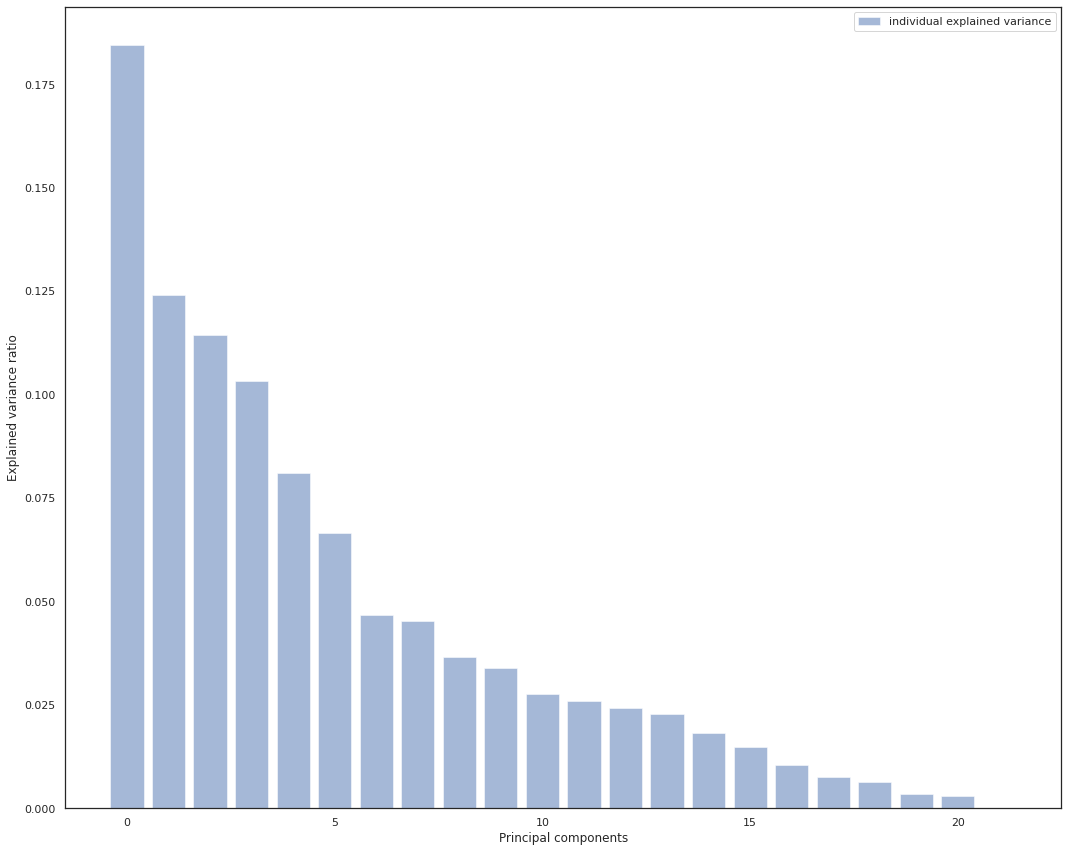

In [0]:
# Plot the features with its variance
plt.figure(figsize=(15, 12))

plt.bar(range(22), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

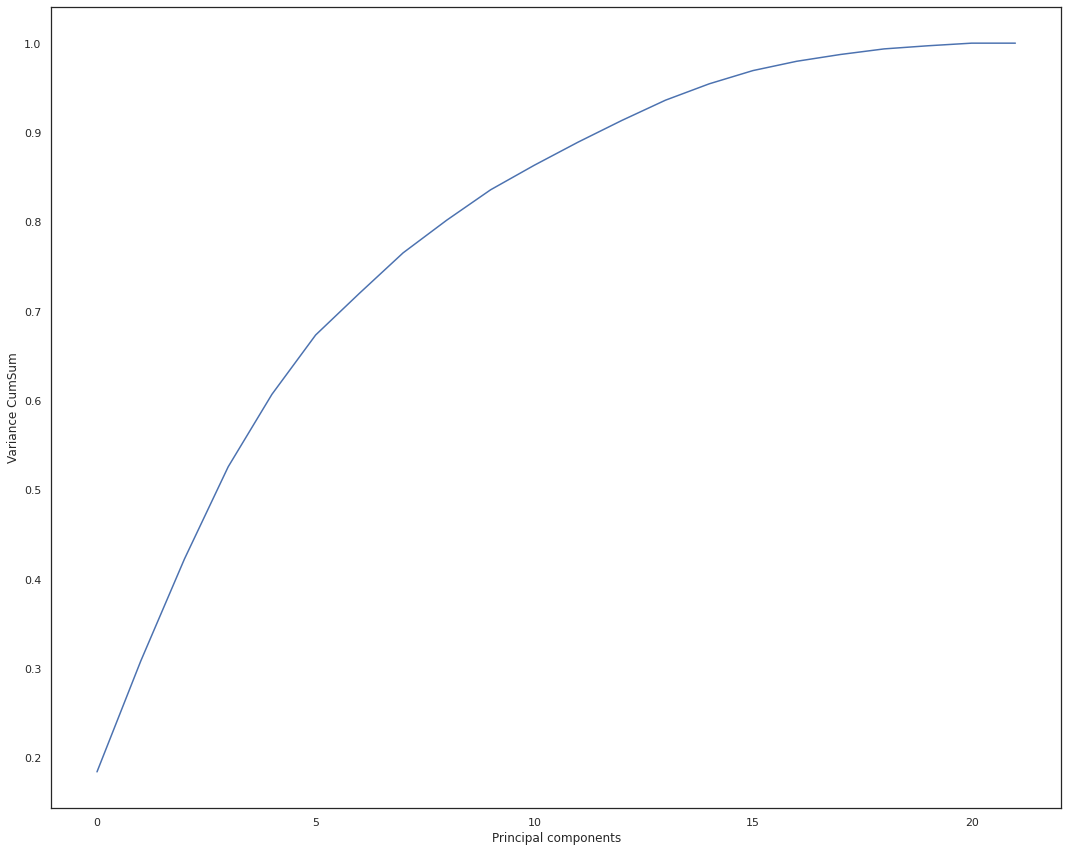

In [0]:
# Plot the features with its variance
plt.figure(figsize=(15, 12))

plt.plot(range(22), explained_variance.cumsum())
plt.ylabel('Variance CumSum')
plt.xlabel('Principal components')
plt.tight_layout()

In [0]:
REQUIRED_WHOLE_VARIANCE = 1

number_of_required_features = np.where(explained_variance.cumsum() >= REQUIRED_WHOLE_VARIANCE)[0][0]

print(f"We need to get {number_of_required_features} features of PCA to get the {REQUIRED_WHOLE_VARIANCE*100}% of information.")

We need to get 20 features of PCA to get the 100% of information.


### Visualize PCA

But first let's plot the most important features
We are going to plot just the two features with thehighest features

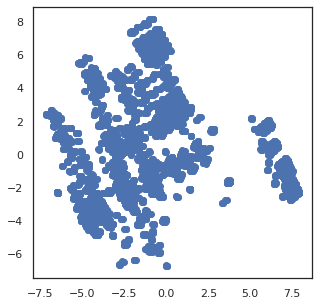

In [0]:
N = X.values 
pca = PCA(n_components=2)
x = pca.fit_transform(N) #

plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

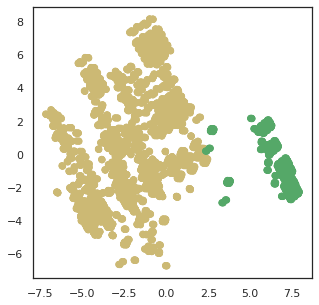

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=5)
X_clustered = kmeans.fit_predict(N)

LABEL_COLOR_MAP = { 0 : 'g', 1 : 'y' }

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.show()

### PCA Transform

Finally we will apply te PCA tranformation to the data.

In [0]:
pca_modified = PCA(n_components=20)
X_pca = pca_modified.fit_transform(X)

# Trainning


Once we have normalize and preprocess all the information we start with the training process. At first we will split our whole dataset into train test split with a 0.2 of test data.

In [0]:
from sklearn.model_selection import train_test_split

# Split
X_train, X_test, y_train, y_test = train_test_split(X_pca,y,test_size=0.2,random_state=4)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR= LogisticRegression()

In [0]:
model_LR.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_prob = model_LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [0]:
print(f"We have a {model_LR.score(X_test, y_pred)*100}% accuracy on test")

We have a 100.0% accuracy on test


## Evaluation

As we now the accuracy sometimes it is not a good representation of the performance and good generalization of our model. Let's study other metrics.

In [0]:
# AUC Curve
auc_roc = metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9674556213017752

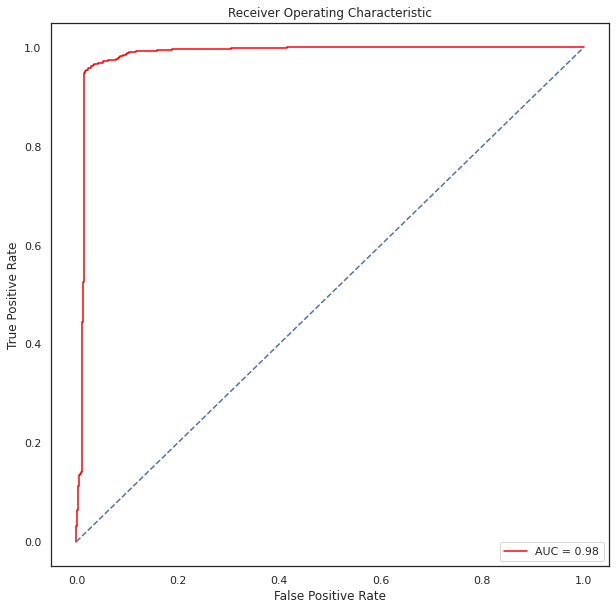

In [0]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_auc_roc(y_test, y_prob):
    # Calculate
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    # Plot 
    plt.figure(figsize=(10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

plot_auc_roc(y_test, y_prob)

# Optimization 

As we can see the curve doesn't represent the best possible performance although we have achieve a 100% of accuracy. Let's optimize with a grid search over the different hyperparameters that the Logistic regression let us study.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_model= LogisticRegression()

tuned_parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
}

In [0]:
X_train.shape

(6499, 20)

In [0]:
from sklearn.model_selection import GridSearchCV

LR= GridSearchCV(LR_model, tuned_parameters, cv=10)

LR.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
print(LR.best_params_)

{'C': 100}


In [0]:
y_prob = LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR.score(X_test, y_pred)

1.0

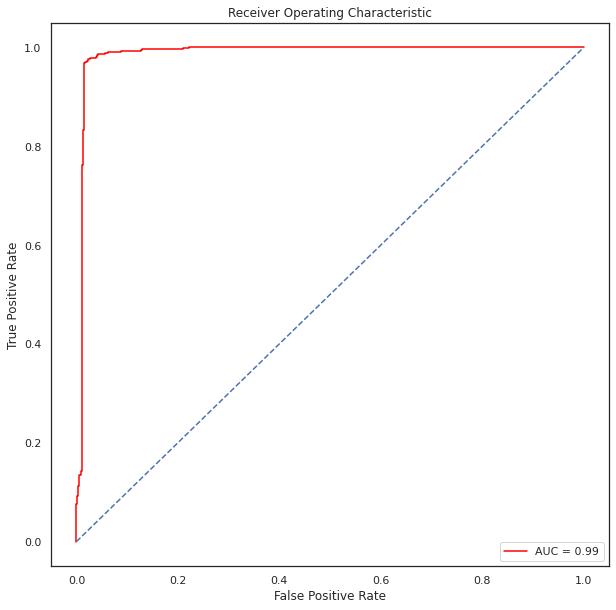

In [0]:
plot_auc_roc(y_test, y_prob)

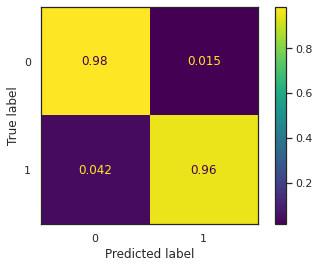

In [0]:
# Metrics
confusion_matrix = metrics.plot_confusion_matrix(LR, X_test, y_test, normalize='true')

In [0]:
auc_roc=metrics.classification_report(y_test, y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       845
           1       0.98      0.96      0.97       780

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625

